# Mikesell Charts
The idea is to easily create information rich charts looking at range vs. range situations in PLO
### This prototype will:
- Model user inputs
- Generate sub-ranges given users inputs
- Model the graphical output

## User Inputs

In [1]:
import ipywidgets as widgets
from IPython.display import display

In [2]:
street = widgets.Select(
    options=['Flop'],
    value='Flop',
    description='Street: ')

In [3]:
board = widgets.Select(
    options=['Ks7s6d'],
    value='Ks7s6d',
    description='Board: ')

In [4]:
preflop = widgets.Select(
    options=['3bp'],
    value='3bp',
    description='Preflop: ')

In [5]:
positions = widgets.Select(
    options=['BN v SB'],
    value='BN v SB',
    description='Positions: ')

In [6]:
vilains_action = widgets.Select(
    options=['IP', 'Checked', 'Bet'],
    value='IP',
    description="Vilain's action: ")

In [7]:
def on_post_button_click(b):
    print(vilains_action.value)
    return None

In [8]:
post_button = widgets.Button(
    description='Generate Chart')

In [9]:
post_button.on_click(on_post_button_click)

In [10]:
display(street, board, preflop, positions, vilains_action, post_button)

Select(description='Street: ', options=('Flop',), value='Flop')

Select(description='Board: ', options=('Ks7s6d',), value='Ks7s6d')

Select(description='Preflop: ', options=('3bp',), value='3bp')

Select(description='Positions: ', options=('BN v SB',), value='BN v SB')

Select(description="Vilain's action: ", options=('IP', 'Checked', 'Bet'), value='IP')

Button(description='Generate Chart', style=ButtonStyle())

## Generate Sub-Ranges
### Here we want to break down ranges into 'meaningful' sub-ranges. What does meaningful mean?
- Digestible (not too many)
- Distinct (not overlapping)
- Understandable (why is solver doing that?)

Input: Board. Example 'Ks7s6d

Output: List of lists. Inner list is [nominal sub-range, ppt sub-range]. Example [['KK', 'KK'], ['77', '77!KK'], ...]

In [11]:
def trips():
    trips_list = []
    for i, rank in enumerate([x for i, x in enumerate(board.value) if i % 2 == 0]):
        temp_list = []
        temp_list.append(f'{rank}{rank}')
        
        if i == 0:
            ppt_exclude = ''
        elif i == 1:
            ppt_exclude = f'!{board.value[i*2-2]}{board.value[i*2-2]}'
        else:
            ppt_exclude = f'!({board.value[i*2-4]}{board.value[i*2-4]},{board.value[i*2-2]}{board.value[i*2-2]})'
            
        ppt = f'{rank}{rank}{ppt_exclude}'
        temp_list.append(ppt)

            
        trips_list.append(temp_list)
        
    return trips_list
    

In [12]:
def two_pair():
    A = board.value[0]
    B = board.value[2]
    C = board.value[4]
    
    exclude_base = f'!({A}{A},{B}{B},{C}{C}'
    top_two = [f'{A}{B}', f'{A}{B}{exclude_base})']
    top_bottom = [f'{A}{C}', f'{A}{C}{exclude_base},{A}{B})']
    bottom_two = [f'{B}{C}', f'{A}{B}{exclude_base},{A}{B},{A}{C})']
    
    return [top_two, top_bottom, bottom_two]
    
    
        

In [13]:
trip_list = trips()
two_pair_list = two_pair()
sub_range_labels = [x[0] for x in trip_list + two_pair_list]
data = [[50.7, 38.4, 10.9], [0.6, 99.4, 0], [7.4, 92.6, 0], [20.2, 34.6, 45.2], [38.0, 38.4, 23.5], [52.5, 41.1, 6.4]]

## Model the Output

In [14]:
import matplotlib.pyplot as plt
import numpy as np

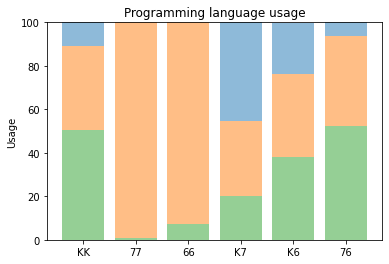

In [15]:
y_pos = np.arange(len(sub_range_labels))
checks = np.array([x[0] for x in data])
half = np.array([x[1] for x in data])
pot = np.array([x[2] for x in data])

p3 = plt.bar(y_pos, pot, align='center', alpha=0.5, bottom=checks+half)
p2 = plt.bar(y_pos, half, align='center', alpha=0.5, bottom=checks)
p1 = plt.bar(y_pos, checks, align='center', alpha=0.5)

plt.xticks(y_pos, sub_range_labels)
plt.ylabel('Usage')
plt.title('Programming language usage')

plt.show()